## Median və **Mean** (orta qiymət) arasındakı münasibət bizə datan barədə məlumat verir



### 📌 1. **Median = Mean**

Bu halda data **simmetrik** paylanmışdır.
→ Klassik nümunə: **normal paylanma (bell shape)**.

---

### 📌 2. **Median < Mean**

Bu zaman data **sağa meyllidir (right-skewed / positive skew)**.
→ Deməkdir ki, bəzi **böyük çıxıntılı (outlier)** dəyərlər ortanı yuxarı çəkir.

**Nümunə**: gəlir, qiymət dataları (çox insan az maaş alır, az insan çox maaş alır).

---

### 📌 3. **Median > Mean**

Bu halda data **sola meyllidir (left-skewed / negative skew)**.
→ Yəni bəzi **çox kiçik** çıxıntılı dəyərlər ortanı aşağı çəkir.

**Nümunə**: imtahan nəticələri (çox insan yüksək alır, az insan 0 və ya çox aşağı alır).

---

### 📌 Sadə qayda:

* **Sağ meyillilik (Positive skew):** `Mean > Median`
* **Sola meyillilik (Negative skew):** `Mean < Median`

---

İstəsən, bu fərqləri qrafiklərlə və kodla da göstərə bilərəm.


##  **Filiallar** və **Gəlir** Median və Mean arasındakı münasibət. Təsəvvür edək ki, 3 filial var və hər bir filial üçün gəlir dəyərlərini təhlil edirik:



### 🔹 **Filial A** – Median = Mean

Bu filialın gəlir paylanması **simmetrikdir**.
Yəni həm aşağı, həm də yuxarı gəlirli günlər **bərabər səviyyədə yayılıb**.

✅ **Nəticə**:

* Gəlirlər **normal səviyyədə dəyişir**.
* Çox yüksək və ya çox aşağı günlər **çox deyil**.
* Bu filialda **sabitlik** var.

---

### 🔹 **Filial B** – Median > Mean

Bu filialın gəlirləri **sola meyllidir (left-skewed)**.
Yəni bəzən **çox az gəlir** olan günlər olur və bu, ortalama (mean) dəyəri aşağı salır.

✅ **Nəticə**:

* Gəlirlərin çoxu **yüksəkdir**, amma **bəzən çox zəif günlər** olur.
* Bu zəif günlər ortanı aşağı salır, amma median yüksək qalır.
* Belə desək: **ümumilikdə filial yaxşı işləyir**, sadəcə **nadir hallarda çox pis günlər** olur.

---

### 🔹 **Filial C** – Median < Mean

Bu filialın gəlirləri **sağa meyllidir (right-skewed)**.
Yəni bəzən **çox yüksək gəlirli günlər** olur və bu ortanı yuxarı çəkir.

✅ **Nəticə**:

* Gəlirlərin çoxu **aşağı səviyyədədir**, amma **nadir hallarda çox uğurlu günlər** olur.
* Bu uğurlu günlər mean-i yuxarı qaldırır.
* Belə desək: **filial ümumilikdə zəifdir**, amma **bəzən partlayış olur**.

---

### 🧠 Yekun:

| Filial | Median və Mean | Paylanma     | Yorum                              |
| ------ | -------------- | ------------ | ---------------------------------- |
| A      | Median = Mean  | Simmetrik    | Sabit gəlir                        |
| B      | Median > Mean  | Sola meyilli | Çox vaxt yaxşı, nadir zəif günlər  |
| C      | Median < Mean  | Sağa meyilli | Çox vaxt zəif, nadir uğurlu günlər |



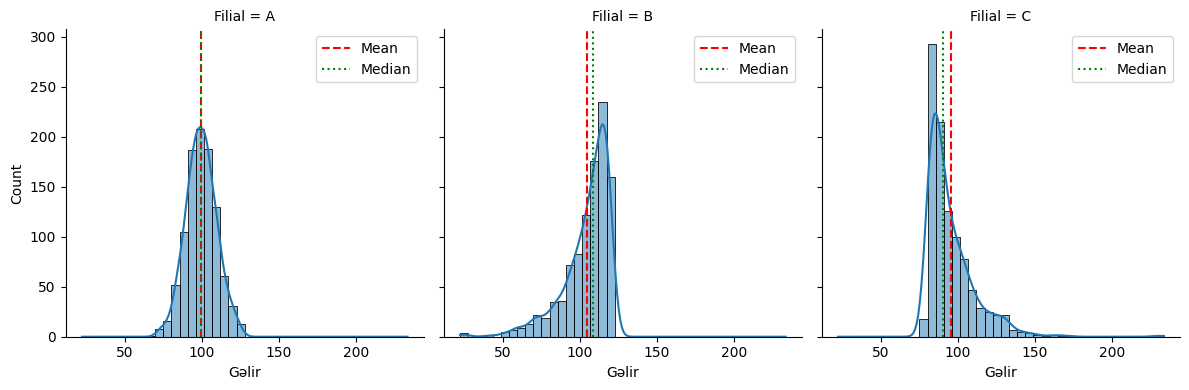

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Süni data
np.random.seed(0)
data_a = np.random.normal(loc=100, scale=10, size=1000)               # Filial A – Simmetrik
data_b = 120 - np.random.exponential(scale=15, size=1000)             # Filial B – Sola meylli
data_c = np.random.exponential(scale=15, size=1000) + 80              # Filial C – Sağa meylli

# DataFrame yaradılır
df = pd.DataFrame({
    'Gəlir': np.concatenate([data_a, data_b, data_c]),
    'Filial': (['A'] * len(data_a)) + (['B'] * len(data_b)) + (['C'] * len(data_c))
})

# Seaborn displot (facetləşdirilmiş)
g = sns.displot(
    data=df,
    x='Gəlir',
    col='Filial',
    kde=True,
    bins=40,
    height=4,
    aspect=1,
    facet_kws=dict(sharex=False)
)

# Hər subplot üçün mean və median xətləri
for ax, label in zip(g.axes.flat, ['A', 'B', 'C']):
    sub_data = df[df['Filial'] == label]['Gəlir']
    ax.axvline(sub_data.mean(), color='red', linestyle='--', label='Mean')
    ax.axvline(sub_data.median(), color='green', linestyle=':', label='Median')
    ax.legend()

plt.tight_layout()
plt.show()






Yuxarıdakı qrafiklərdə:

* **Filial A**: Qırmızı (mean) və yaşıl (median) xətlər üst-üstə düşür → **simmetrik paylanma**.
* **Filial B**: Median (yaşıl) sağdadır, mean (qırmızı) soldadır → **sola meyilli** → çox vaxt yaxşı işləyir, amma bəzən zəif günlər var.
* **Filial C**: Mean sağdadır, median soldadır → **sağa meyilli** → çox vaxt zəifdir, amma nadir hallarda yüksək gəlirli günlər olur.



##  A və B filiallarında Variance problemi



### 📌 Sualdakı məqamlar:

1. **A və B filiallarında mean = median** → **hər iki filialda normal (simmetrik) paylanma** var.
2. **A filialı**: Variance az → **paylanma dardır**, qrafik **daha dik**.
3. **B filialı**: Variance çox → **paylanma genişdir**, qrafik **daha yastı**.

---

### 🎯 Nəticə:

Hər iki filialda gəlirlər normal paylanıb, amma **dəyişkənlik fərqlidir**:

* A-da **stabil gəlir** – az dəyişir.
* B-də **daha qeyri-sabit gəlir** – çox dəyişir.

---





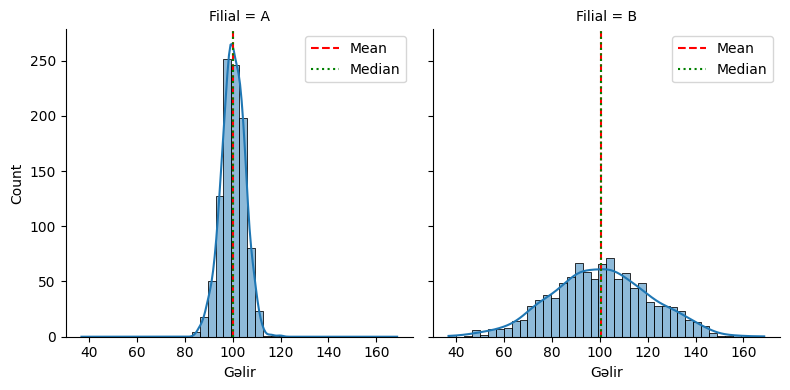

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Süni data – hər ikisi normal paylanmış, amma fərqli dispersiyalarla
np.random.seed(1)
data_a = np.random.normal(loc=100, scale=5, size=1000)   # A – az variance
data_b = np.random.normal(loc=100, scale=20, size=1000)  # B – çox variance

# DataFrame
df = pd.DataFrame({
    'Gəlir': np.concatenate([data_a, data_b]),
    'Filial': ['A'] * len(data_a) + ['B'] * len(data_b)
})

# Seaborn facet histogram + KDE
g = sns.displot(
    data=df,
    x='Gəlir',
    col='Filial',
    kde=True,
    bins=40,
    height=4,
    aspect=1,
    facet_kws=dict(sharex=True)  # eyni ox ölçüsündə müqayisə
)

# Mean və Median xətləri
for ax, label in zip(g.axes.flat, ['A', 'B']):
    sub_data = df[df['Filial'] == label]['Gəlir']
    ax.axvline(sub_data.mean(), color='red', linestyle='--', label='Mean')
    ax.axvline(sub_data.median(), color='green', linestyle=':', label='Median')
    ax.legend()

plt.tight_layout()
plt.show()


---

### 🧠 İzah:

* Hər iki filialda qırmızı və yaşıl xətlər üst-üstədir → **simmetrik normal paylanma**.
* Amma A filialında qrafik **dik və dar** → **az dispersiya**.
* B filialında qrafik **yastı və geniş** → **çox dispersiya**.



## **Filialların performansı** və **risk baxımından** təhlili




## 🎯 Vəziyyətin Təsviri:

| Filial | Paylanma tipi      | Ortalama | Dispersiya (variance) | Şəkil          |
| ------ | ------------------ | -------- | --------------------- | -------------- |
| A      | Normal (simmetrik) | 100      | Aşağı (5)             | Dar və dik     |
| B      | Normal (simmetrik) | 100      | Yüksək (20)           | Geniş və yastı |

---

## 📊 İzah və Müqayisə:

### 🔹 **Orta gəlir**:

Hər iki filialda orta gəlir **eyni** (100 AZN). Yəni **ümumi performans bənzər görünür**.

---

### 🔹 **Dispersiya / Variance** (dəyişkənlik):

#### 🏢 **Filial A** – *Dispersiya azdır*:

* Gəlirlər **daha sabitdir**, çox dəyişmir.
* **Ən pis günlərdə belə zərər böyük deyil**, çünki dəyərlər ortalama ətrafında sıxılıb.
* Menecerlər üçün **risk azdır**, **planlama asandır**.
* **Yüksək etibarlılıq** → hər ay təxminən eyni gəlir.

✅ **Güclü tərəf**: Stabil və proqnozlaşdırıla bilən.
❌ **Potensial problem**: Artım (böyümə) ehtimalı az ola bilər.

---

#### 🏢 **Filial B** – *Dispersiya çoxdur*:

* Gəlirlər **çox dəyişkəndir**, bəzi günlər yüksək, bəzi günlər çox aşağı ola bilər.
* **Risk yüksəkdir**, çünki gözlənilməz zəif performanslar ola bilər.
* Menecerlər üçün **planlama çətindir**, ehtiyat fondlara ehtiyac ola bilər.

✅ **Güclü tərəf**: Bəzən çox yüksək gəlir əldə edə bilər.
❌ **Problem**: **Qeyri-sabitlik və risk** – gəlirlərdə güclü eniş-yoxuşlar var.

---

## 🔍 Ümumi Yorum:

* **Filial A** – **sabit, təhlükəsiz, proqnozlaşdırıla bilən** gəlir modeli. Problem azdır.
* **Filial B** – **riskli**, amma potensialı olan filialdır. Əgər idarə olunmazsa, **zərər riski** yüksəkdir.

---

## ✅ Tövsiyə:

* **Filial A**: Sabitliyi qoruyaraq yavaş-yavaş böyümə imkanları axtarılsın.
* **Filial B**: Variansı azaltmaq üçün əməliyyatlar analiz edilməli və **stabilizasiya tədbirləri** görülməlidir (məsələn, müştəri axınına nəzarət, reklam xərclərinə optimallaşdırma, riskli kampaniyalardan qaçınmaq və s.).




## Filialların Boxplot və Violinplot Analyse

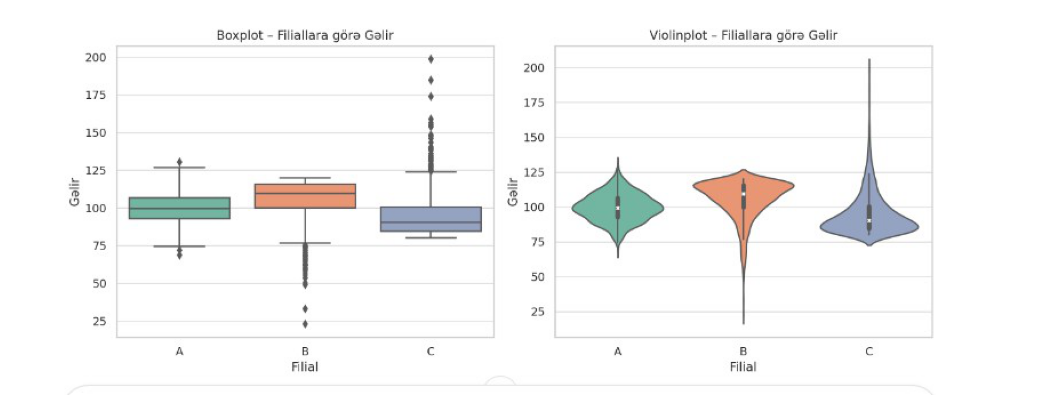

In [12]:
from PIL import Image
import matplotlib.pyplot as plt

# Fayl yolunun əsas hissəsi
base_path = r'C:\Users\dell\Desktop\Selfedu\Filial_Analyse.jpg'
img = Image.open(base_path)

plt.figure(figsize=(25, 5))  # Şəkilin ölçüsü
plt.imshow(img)
plt.axis('off')  # Oxları gizlətmək üçün
plt.show() 

### 📊 Nəticələrin İzahı:

| Filial | Ortalama (mean) | Standart Sapma (std) | Varians (var) | Şərh                            |
| ------ | --------------- | -------------------- | ------------- | ------------------------------- |
| **A**  | 99.65           | **10.00**            | **100.02**    | Sabit gəlir, aşağı risk         |
| **B**  | 105.64          | **13.69**            | **187.39**    | Daha çox dəyişkənlik, orta risk |
| **C**  | 94.90           | **14.76**            | **217.90**    | Ən çox dəyişkənlik, yüksək risk |

---

### 📦 **Boxplot və 🎻 Violinplot təhlili:**

* **Boxplot**:

  * A filialında qutu daha dardır → gəlirlər ortalama ətrafında cəmlənib.
  * B və C filiallarında qutu daha uzundur → dəyişkənlik böyükdür, outlier-lar da mövcuddur.

* **Violinplot**:

  * A filialı: dar və simmetrik paylanma.
  * B filialı: daha geniş, sağa yönəlmiş paylanma.
  * C filialı: çox daha geniş və yayılmış – yəni **ən qeyri-sabit** filial.

---

### 🧠 Əsas Nəticə:

* **A** filialı: Sabit, aşağı risk – planlama və proqnozlaşdırma üçün uyğundur.
* **B** filialı: Yaxşı orta gəlir var, amma dəyişkənlik yüksəkdir → **yüngül risk**.
* **C** filialı: Dəyişkənlik və risk çox yüksəkdir → **nəzarət və stabilləşdirmə lazımdır**.

